## Import relevant libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as ss
import category_encoders as ce
import imblearn
sb.set()

# plotly plots for interactive plots
# annotated heatmap
import plotly.figure_factory as ff

# metrics to import
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# models to use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

## Exploratory analysis

#### Import dataset and perform necessary statistical analysis.

In [4]:
# training set
train_values = pd.read_csv('train_values.csv')
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
train_values.shape

(260601, 39)

In [13]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


#### Convert `damage_grade` to type category.

In [14]:
train_labels['damage_grade'] = train_labels['damage_grade'].astype('category')
train_labels.dtypes

building_id        int64
damage_grade    category
dtype: object

#### Join `train_labels` and `train_values`.

In [15]:
train_data = train_values.merge(train_labels, how = 'inner', on = 'building_id')
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


As we are only interested in `age` and `height_percentage`, extract these variables and `damage_grade` from `train_data`.

In [16]:
num_data = pd.DataFrame(train_data[['count_floors_pre_eq', 'age', 'height_percentage', 'area_percentage', 'count_families', 'damage_grade']])
num_data.head()

,count_floors_pre_eq,age,height_percentage,area_percentage,count_families,damage_grade
0,2,30,5,6,1,3
1,2,10,7,8,1,2
2,2,10,5,5,1,3
3,2,10,5,6,1,2
4,3,30,9,8,1,3


#### Plot standard plotsfor each response variable.

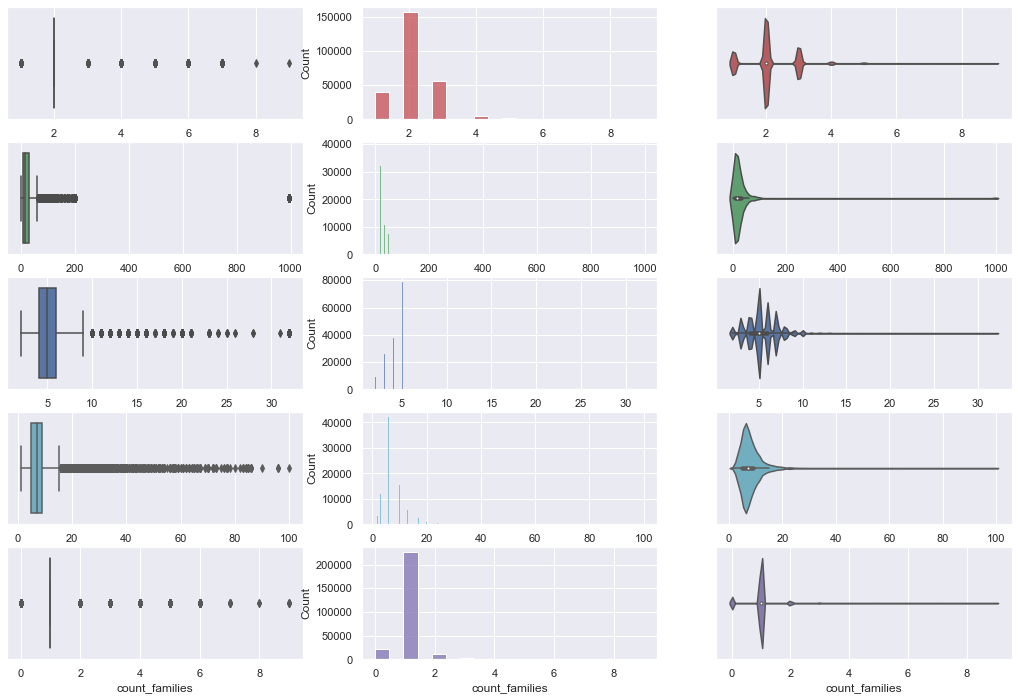

In [17]:
f, axes = plt.subplots(5, 3, figsize = (18, 12))
colours = ['r', 'g', 'b', 'c', 'm']

for i in range(5):
    sb.boxplot(x = num_data.columns[i], data = num_data,
              color = colours[i], ax = axes[i, 0])
    sb.histplot(x = num_data.columns[i], data = num_data,
              color = colours[i], ax = axes[i, 1])
    sb.violinplot(x = num_data.columns[i], data = num_data,
              color = colours[i], ax = axes[i, 2])

#### Plot boxplots to illustrate the relationship between each response variable and `damage_grade`.

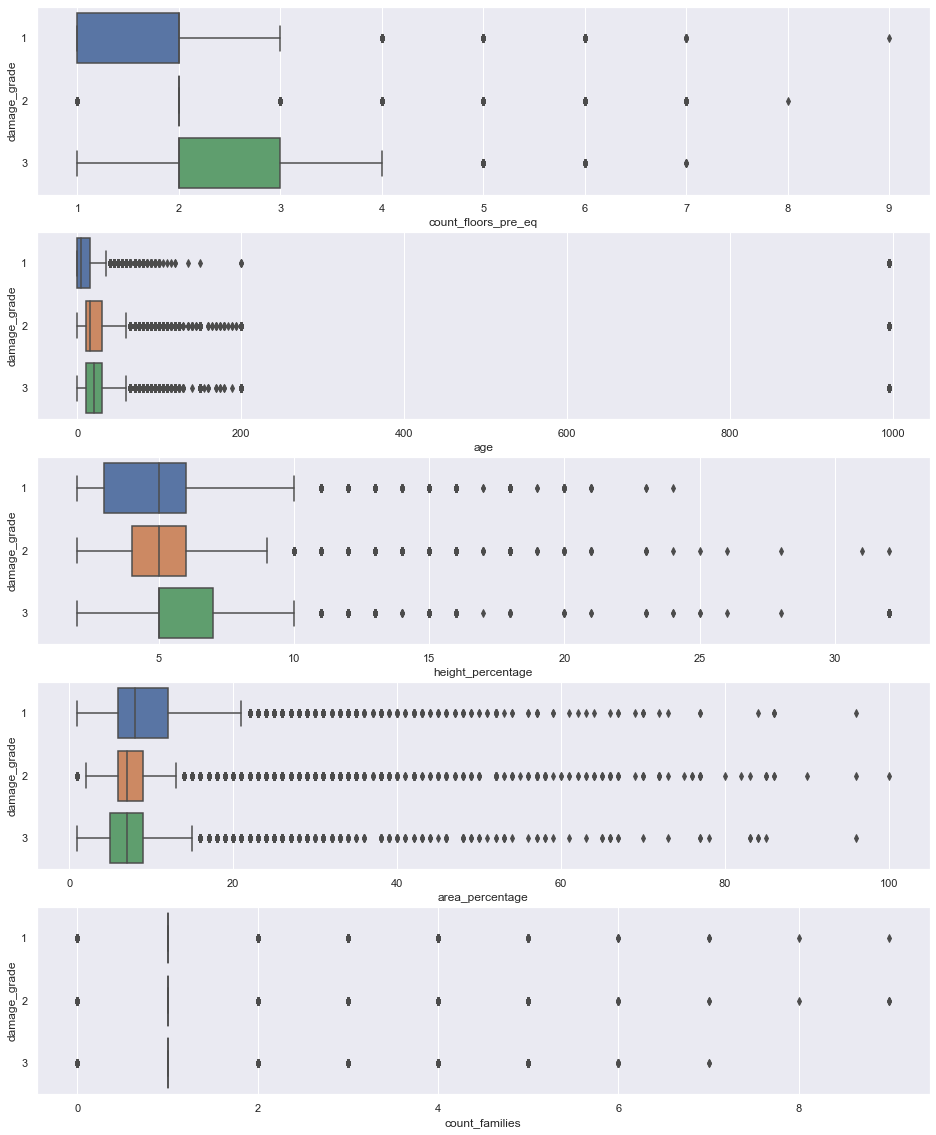

In [18]:
f, axes = plt.subplots(5, 1, figsize = (16, 20))
for i in range(5):
    sb.boxplot(x = num_data.columns[i], y = 'damage_grade', data = num_data,
              ax = axes[i])

From the boxplots, there is an increase in `count_floors_pre_eq`, `age`, `height_percentage` and `area_percentage`  as `damage_grade` increases. This means that the four response variables are related to `damage_grade`.

From the boxplots, we will be choosing these 4 variables to train our models: `count_floors_pre_eq`, `age`, `height_percentage` and `area_percentage`, due to their relationship with `damage_grade`.

#### Get the countplot for `damage_grade`.

<AxesSubplot:xlabel='damage_grade', ylabel='count'>

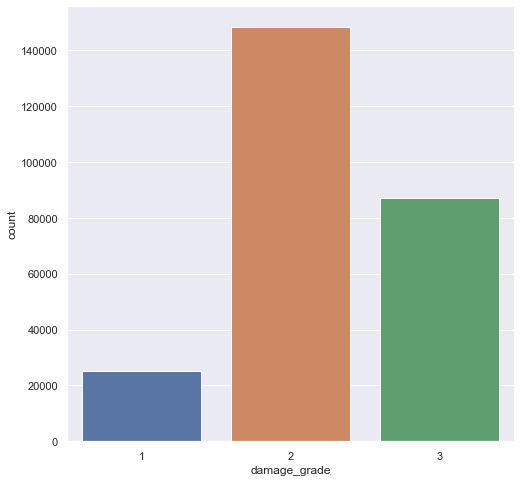

In [19]:
plt.figure(figsize = (8, 8))
sb.countplot(x = 'damage_grade', data = num_data)

From the countplot, `damage_grade` is unbalanced with 2 having the most number of observations and 1 having the least number of observations. To improve our model, we will use SMOTE on the training set.

#### Relationship for categorical variables.

<AxesSubplot:>

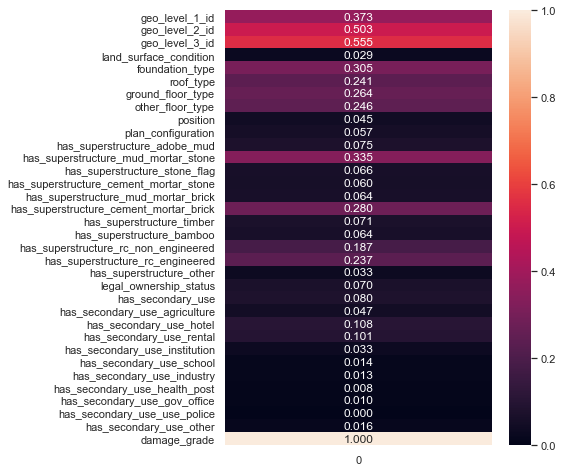

In [20]:
# function for cramer's V
def cramers_v(x_var, df):
    confusion_matrix = pd.crosstab(df[x_var], df['damage_grade'])
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, (phi2 - (((k-1)*(r-1))/(n-1))))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


train_data_copy = train_data.copy()

# extract all objects
cat_obj_list = list(train_data_copy.select_dtypes('object').columns)
# convert variables in cat_obj_list to type category
train_data_copy[cat_obj_list] = train_data_copy[cat_obj_list].astype('category')

# convert categorical variables encoded in the form of numbers to category
cat_as_num = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']
train_data_copy[cat_as_num] = train_data_copy[cat_as_num].astype('category')

# extract only the categorical variables to perform cramer's v
cat_var = train_data_copy.select_dtypes('category')

cramers_v_coef = []
cramers_v_var = list(cat_var.columns)

# calculate cramer's V for each variable against damage_grade
for var in cramers_v_var:
    coef = cramers_v(var, cat_var)
    cramers_v_coef.append(coef)
    
# visualise cramer's V with a heatmap
cramers_v_coef = pd.DataFrame(data = cramers_v_coef, index = cramers_v_var)
plt.figure(figsize = (6, 8))
sb.heatmap(cramers_v_coef, annot = True, annot_kws = {'size': 12}, fmt = '.3f')

### Does `height_percentage` affect the severity of damage?

#### Split into tall buildings and short buildings.

In [21]:
height_q3 = num_data['height_percentage'].quantile(0.75)
height_q1 = num_data['height_percentage'].quantile(0.25)
height_iqr = height_q3 - height_q1

tall_buildings = num_data[num_data['height_percentage'] > (height_q3 + 1.5 * height_iqr)]
short_buildings = num_data[num_data['height_percentage'] <= (height_q3 + 1.5 * height_iqr)]

#### Get the percentage of buildings of each grade for tall buildings and short buildings.

In [22]:
tall_buildings['damage_grade'].value_counts(normalize = True)

2    0.552595
3    0.241617
1    0.205789
Name: damage_grade, dtype: float64

In [23]:
short_buildings['damage_grade'].value_counts(normalize = True)

2    0.569418
3    0.337568
1    0.093014
Name: damage_grade, dtype: float64

From the above, there is a lower percentage of short buildings with a `damage_grade` of 1 than tall buildings. As `damage_grade` is ordinal, this shows that tall buildings are less likely to receive severe damage than short buildings.

#### Heatmap for `height_percentage`

<AxesSubplot:xlabel='damage_grade', ylabel='height_percentage'>

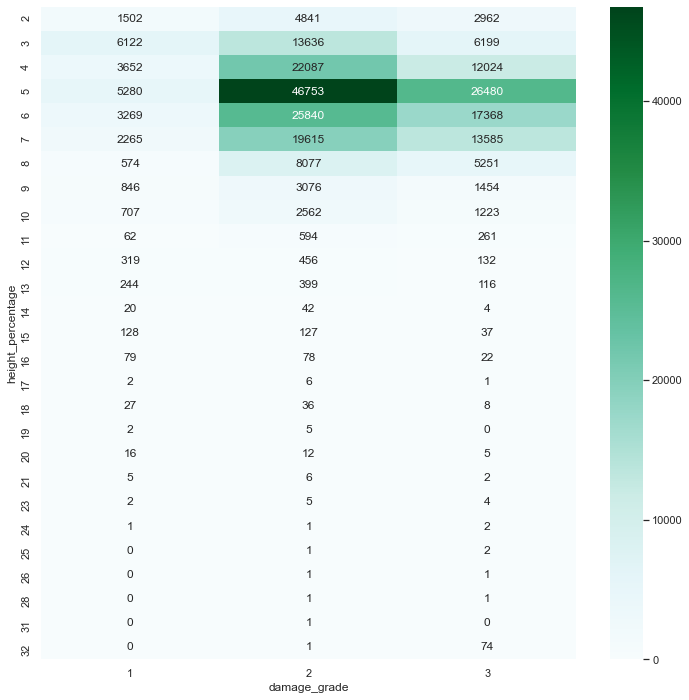

In [24]:
# height_percentage
plt.figure(figsize = (12, 12))
sb.heatmap(num_data.groupby(['height_percentage', 'damage_grade']).size().unstack(),
          annot = True, annot_kws = {'size' : 12}, fmt = '.0f', cmap = 'BuGn')

<AxesSubplot:xlabel='damage_grade', ylabel='height_percentage'>

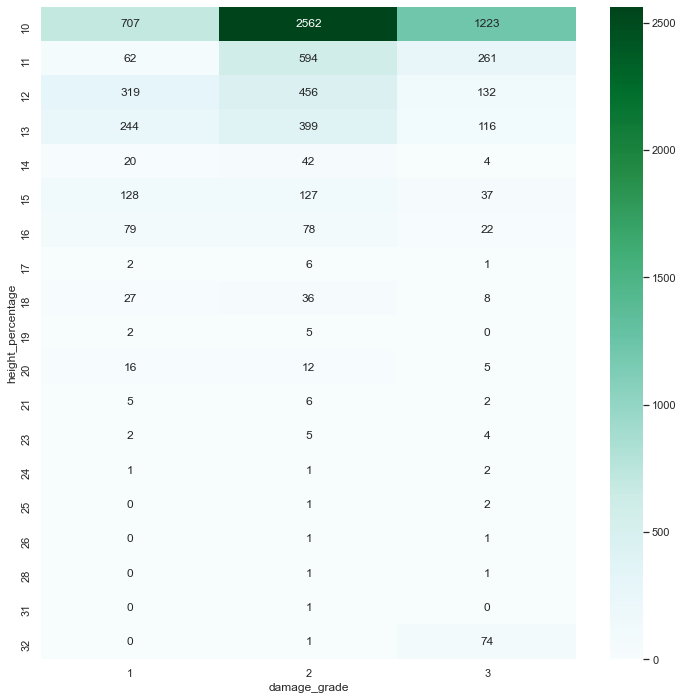

In [17]:
# tall buildings
plt.figure(figsize = (12, 12))
sb.heatmap(tall_buildings.groupby(['height_percentage', 'damage_grade']).size().unstack(),
          annot = True, annot_kws = {'size' : 12}, fmt = '.0f', cmap = 'BuGn')

<AxesSubplot:xlabel='damage_grade', ylabel='height_percentage'>

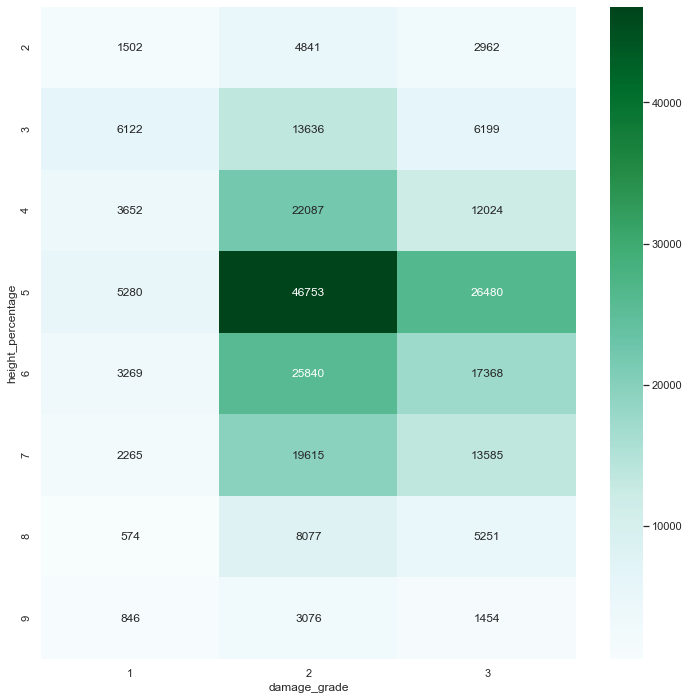

In [18]:
# short buildings
plt.figure(figsize = (12, 12))
sb.heatmap(short_buildings.groupby(['height_percentage', 'damage_grade']).size().unstack(),
          annot = True, annot_kws = {'size' : 12}, fmt = '.0f', cmap = 'BuGn')

# Machine learning

#### Split into X_data and y_data.

In [19]:
X_tall_data = pd.DataFrame(tall_buildings[['count_floors_pre_eq', 'age', 'height_percentage', 'area_percentage',]])
y_tall_data = pd.DataFrame(tall_buildings['damage_grade'])

X_short_data = pd.DataFrame(short_buildings[['count_floors_pre_eq', 'age', 'height_percentage', 'area_percentage']])
y_short_data = pd.DataFrame(short_buildings['damage_grade'])

X_data = pd.DataFrame(train_data[['count_floors_pre_eq', 'age', 'height_percentage', 'area_percentage']])
y_data = pd.DataFrame(train_data['damage_grade'])

#### Define functions for cross-validation.

In [20]:
# # extract the response variable we are investigating, then perform train-test-split
# def get_variables_df(var_list, response_df, predictor_df):
    
#     var_input = pd.DataFrame(response_df[var_list])
#     # perform 70%-30% split on the data set
#     var_train, var_test, response_train, response_test = train_test_split(var_input, predictor_df, test_size = 0.3)
#     return var_train, var_test, response_train, response_test


# split the training data via smote
def oversample_train(X, y):
    
    smote = imblearn.over_sampling.SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


# calcuclate scores with this function
def calculate_scores(model, X, y, y_pred):
        
    svf = StratifiedKFold(n_splits = 10, shuffle = True)
    accuracy_list = cross_val_score(estimator = model, X = X, y = y.values.ravel(), cv = svf, n_jobs = 2)
    accuracy = accuracy_list.mean()
    accuracy_std = accuracy_list.std()
    precision = precision_score(y_true = y, y_pred = y_pred, average = None, zero_division = 0)
    recall = recall_score(y_true = y, y_pred = y_pred, average = None, zero_division = 0)
    f1 = f1_score(y_true = y, y_pred = y_pred, average = None, zero_division = 0)
    
    return accuracy, accuracy_std, precision, recall, f1


# print scores with this function
def print_scores(train_or_test, accuracy, accuracy_std, precision_list, recall_list, f1_list):
    print(f'{train_or_test} set:')
    print(f'Accuracy: {accuracy:.3f}, Standard Deviation: {accuracy_std:.3f}')
    print()
    print('damage_grade:\t 1 \t\t 2 \t\t 3 \t\t Average')
    print()
    print(f'Precision: \t {precision_list[0]:.3f} \t\t {precision_list[1]:.3f} \t\t {precision_list[2]:.3f} \t\t {(sum(precision_list)/len(precision_list)):.3f}')
    print(f'Recall: \t {recall_list[0]:.3f} \t\t {recall_list[1]:.3f} \t\t {recall_list[2]:.3f} \t\t {(sum(recall_list)/len(recall_list)):.3f}')
    print(f'F1 score: \t {f1_list[0]:.3f} \t\t {f1_list[1]:.3f} \t\t {f1_list[2]:.3f} \t\t {(sum(f1_list)/len(f1_list)):.3f}')
    print()

def print_confusion_matrices(str_model, y, y_pred, axes):
    sb.heatmap(confusion_matrix(y_true = y, y_pred = y_pred), annot = True,
               annot_kws = {'size' : 12}, fmt = '.0f', ax = axes)
    axes.set_xlabel(f'Predicted damage_grade for {str_model}')
    axes.set_ylabel(f'Actual damage_grade for {str_model}')
    axes.xaxis.set_ticklabels([1, 2, 3])
    axes.yaxis.set_ticklabels([1, 2, 3])
    
# train model with training data then obtain the confusion matrices and accuracy
def cross_validate_model(model, str_model, X_train_resampled, X_test, y_train_resampled, y_test):
    
    # cross validate and predict the dataset
    svf = StratifiedKFold(n_splits = 10, shuffle = True)
    y_train_pred = cross_val_predict(estimator = model, X = X_train_resampled, y = y_train_resampled.values.ravel(), cv = svf, n_jobs = 2)
    
    # plot confusion matrices
    f, axes = plt.subplots(1, 1, figsize = (6, 6))
    print_confusion_matrices(str_model, y_train_resampled, y_train_pred, axes)
    accuracy_train, accuracy_train_std, precision_train, recall_train, f1_train = calculate_scores(model, X_train_resampled, y_train_resampled, y_train_pred)

    # print scores
    print_scores('Training', accuracy_train, accuracy_train_std, precision_train, recall_train, f1_train)
    
def trial_models(X_data, y_data):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)
    
    # oversample the training set first. DO NOT RESAMPLE THE TEST DATA!
    X_train_resampled, y_train_resampled = oversample_train(X_train, y_train) 
    
    print('Logistic Regression:')
    logreg = LogisticRegression(max_iter = 1000, multi_class = 'ovr', n_jobs = 2)
    cross_validate_model(logreg, 'Logistic Regression', X_train_resampled, X_test, y_train_resampled, y_test)
    print('\n')
    
    print('Random Forest Classifier:')
    forest = RandomForestClassifier(max_depth = 10, n_jobs = 2)
    cross_validate_model(forest, 'Random Forest Classifier', X_train_resampled, X_test, y_train_resampled, y_test)
    print('\n')
    
    print('Gaussian NB:')
    naive = GaussianNB()
    cross_validate_model(naive, 'Gaussian NB', X_train_resampled, X_test, y_train_resampled, y_test)
    print('\n')

#### Define functions to test our chosen model.

In [21]:
# functions for testing data
def calculate_scores_test(model, X, y, y_pred):
    
    accuracy = model.score(X, y)
    precision = precision_score(y_true = y, y_pred = y_pred, average = None, zero_division = 0)
    recall = recall_score(y_true = y, y_pred = y_pred, average = None, zero_division = 0)
    f1 = f1_score(y_true = y, y_pred = y_pred, average = None, zero_division = 0)
    
    return accuracy, precision, recall, f1

def test_models(model, str_model, X_train_resampled, X_test, y_train_resampled, y_test):
#     # split data and oversample training set
#     X_train, X_test, y_train, y_test = get_variables_df(var_list, X_data, y_data)
#     X_train_resampled, y_train_resampled = oversample_train(X_train, y_train) 
    
    # fit model
    model.fit(X = X_train_resampled, y = y_train_resampled.values.ravel())
    
    # predict
    y_train_pred = model.predict(X = X_train_resampled)
    y_test_pred = model.predict(X = X_test)
    
    accuracy_train, precision_train, recall_train, f1_train = calculate_scores_test(model, X_train_resampled, y_train_resampled, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test = calculate_scores_test(model, X_test, y_test, y_test_pred)
    
    # print the scores and confusion matrix
    print_scores('Training', accuracy_train, 0, precision_train, recall_train, f1_train)
    f, axes = plt.subplots(1, 2, figsize = (12, 6))
    print_confusion_matrices(str_model + ' (Train)', y_train_resampled, y_train_pred, axes[0])
    
    print_scores('Test', accuracy_test, 0, precision_test, recall_test, f1_test)
    print_confusion_matrices(str_model + ' (Test)', y_test, y_test_pred, axes[1])
    
def run_test(X_data, y_data):
    
    # split data and oversample training set to be trained on each model
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)
    X_train_resampled, y_train_resampled = oversample_train(X_train, y_train) 
    
    print('Logistic Regression:')
    logreg = LogisticRegression(max_iter = 1000, multi_class = 'ovr', n_jobs = 2)
    test_models(logreg, 'Logistic Regression', X_train_resampled, X_test, y_train_resampled, y_test)
    print('\n')
    
    print('Random Forest Classifier:')
    forest = RandomForestClassifier(max_depth = 10, n_jobs = 2)
    test_models(forest, 'Random Forest Classifier', X_train_resampled, X_test, y_train_resampled, y_test)
    print('\n')
    
    print('Gaussian NB:')
    naive = GaussianNB()
    test_models(naive, 'Gaussian NB', X_train_resampled, X_test, y_train_resampled, y_test)
    print('\n')
    
def run_random_forest(model, X_data, y_data):
    
    # split data and oversample training set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3)
    X_train_resampled, y_train_resampled = oversample_train(X_train, y_train)
    
    # fit model
    model.fit(X = X_train_resampled, y = y_train_resampled.values.ravel())
    
    # predict
    y_train_pred = model.predict(X = X_train_resampled)
    y_test_pred = model.predict(X = X_test)
    
    accuracy_train, precision_train, recall_train, f1_train = calculate_scores_test(model, X_train_resampled, y_train_resampled, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test = calculate_scores_test(model, X_test, y_test, y_test_pred)
    
    # print the scores and confusion matrix
    f, axes = plt.subplots(1, 2, figsize = (12, 6))
    print_scores('Training', accuracy_train, 0, precision_train, recall_train, f1_train)
    print_confusion_matrices('Random Forest Classifier (Train)', y_train_resampled, y_train_pred, axes[0])
    
    print_scores('Test', accuracy_test, 0, precision_test, recall_test, f1_test)
    print_confusion_matrices('Random Forest Classifier (Test)', y_test, y_test_pred, axes[1])

## Run all models on training set to evaluate the best algorithm.

### Tall buildings.

#### Perform cross-validation on all models.

Logistic Regression:
Training set:
Accuracy: 0.587, Standard Deviation: 0.013

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.646 		 0.532 		 0.549 		 0.576
Recall: 	 0.834 		 0.389 		 0.537 		 0.587
F1 score: 	 0.728 		 0.449 		 0.543 		 0.574



Random Forest Classifier:
Training set:
Accuracy: 0.656, Standard Deviation: 0.014

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.682 		 0.622 		 0.642 		 0.648
Recall: 	 0.900 		 0.377 		 0.689 		 0.655
F1 score: 	 0.776 		 0.469 		 0.665 		 0.637



Gaussian NB:
Training set:
Accuracy: 0.499, Standard Deviation: 0.016

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.551 		 0.449 		 0.469 		 0.490
Recall: 	 0.783 		 0.535 		 0.181 		 0.500
F1 score: 	 0.647 		 0.488 		 0.261 		 0.465





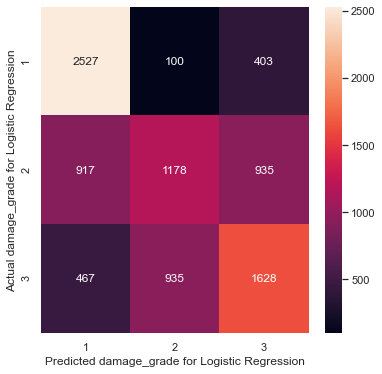

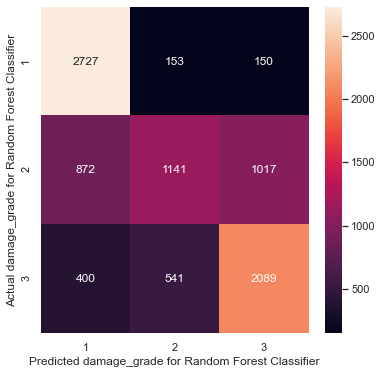

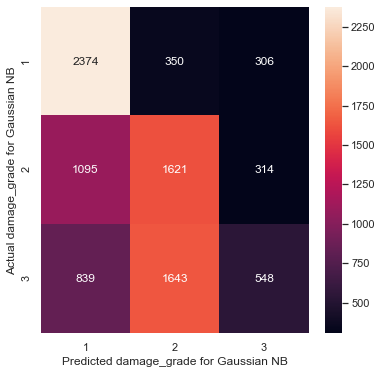

In [22]:
trial_models(X_tall_data, y_tall_data)

#### Train each model on a training and test set to check for overfitting.

Logistic Regression:
Training set:
Accuracy: 0.576, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.631 		 0.540 		 0.532 		 0.568
Recall: 	 0.803 		 0.436 		 0.490 		 0.576
F1 score: 	 0.707 		 0.483 		 0.510 		 0.566

Test set:
Accuracy: 0.518, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.490 		 0.677 		 0.374 		 0.514
Recall: 	 0.843 		 0.410 		 0.467 		 0.573
F1 score: 	 0.620 		 0.511 		 0.415 		 0.515



Random Forest Classifier:
Training set:
Accuracy: 0.718, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.708 		 0.758 		 0.705 		 0.724
Recall: 	 0.916 		 0.490 		 0.748 		 0.718
F1 score: 	 0.799 		 0.595 		 0.726 		 0.707

Test set:
Accuracy: 0.517, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.498 		 0.669 		 0.384 		 0.517
Recall: 	 0.847 		 0.389 		 0.508 		 0.582
F1 score: 	 0.627 		 0.492 		 0.438 		 0.519



Gaussian NB:
Training set:
Ac

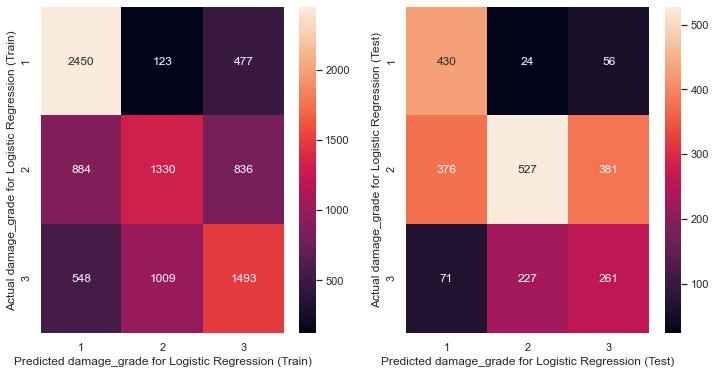

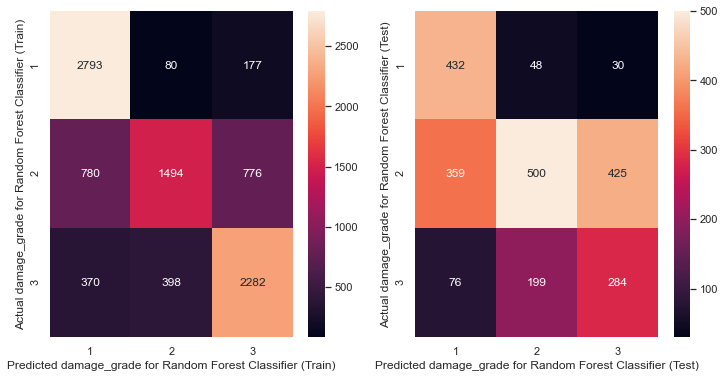

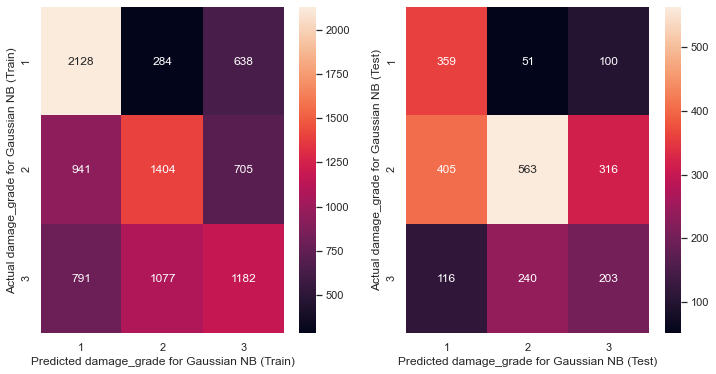

In [23]:
run_test(X_tall_data, y_tall_data)

### Short buildings

#### Perform cross-validation on all models.

Logistic Regression:
Training set:
Accuracy: 0.454, Standard Deviation: 0.003

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.505 		 0.386 		 0.429 		 0.440
Recall: 	 0.600 		 0.148 		 0.613 		 0.454
F1 score: 	 0.548 		 0.214 		 0.505 		 0.422



Random Forest Classifier:
Training set:
Accuracy: 0.511, Standard Deviation: 0.003

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.601 		 0.418 		 0.497 		 0.506
Recall: 	 0.655 		 0.379 		 0.499 		 0.511
F1 score: 	 0.627 		 0.398 		 0.498 		 0.508



Gaussian NB:
Training set:
Accuracy: 0.443, Standard Deviation: 0.003

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.571 		 0.351 		 0.398 		 0.440
Recall: 	 0.482 		 0.065 		 0.784 		 0.444
F1 score: 	 0.523 		 0.109 		 0.528 		 0.386





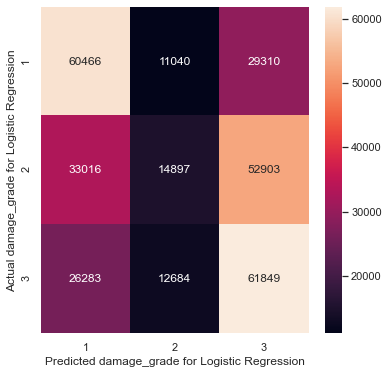

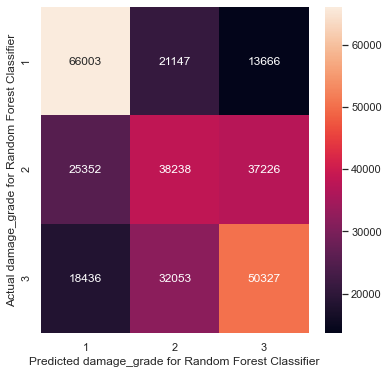

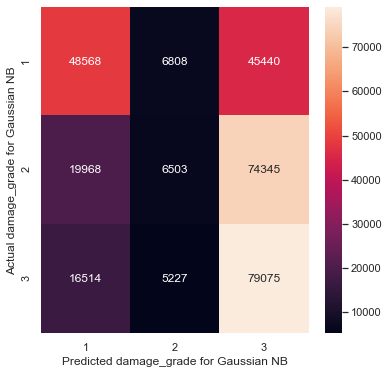

In [24]:
trial_models(X_short_data, y_short_data)

#### Train each model separately and test them to look for overfitting.

Logistic Regression:
Training set:
Accuracy: 0.453, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.503 		 0.381 		 0.430 		 0.438
Recall: 	 0.601 		 0.143 		 0.615 		 0.453
F1 score: 	 0.548 		 0.208 		 0.506 		 0.421

Test set:
Accuracy: 0.342, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.164 		 0.616 		 0.387 		 0.389
Recall: 	 0.594 		 0.141 		 0.611 		 0.449
F1 score: 	 0.257 		 0.230 		 0.474 		 0.320



Random Forest Classifier:
Training set:
Accuracy: 0.515, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.611 		 0.422 		 0.495 		 0.509
Recall: 	 0.639 		 0.354 		 0.552 		 0.515
F1 score: 	 0.624 		 0.385 		 0.522 		 0.510

Test set:
Accuracy: 0.436, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.222 		 0.630 		 0.421 		 0.424
Recall: 	 0.615 		 0.347 		 0.536 		 0.499
F1 score: 	 0.327 		 0.447 		 0.472 		 0.415



Gaussian NB:
Training set:
Ac

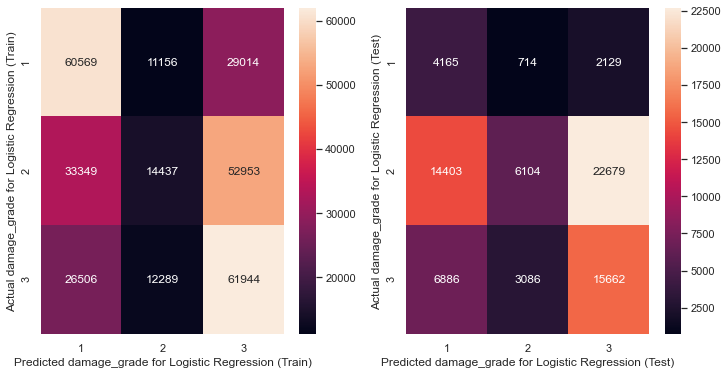

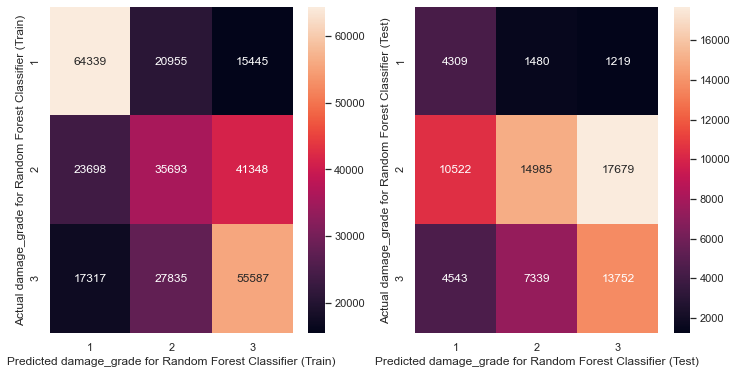

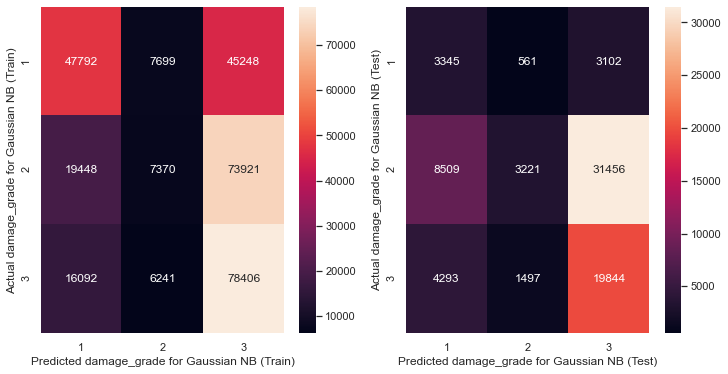

In [25]:
run_test(X_short_data, y_short_data)

### All buildings in the same dataset.

#### Perform cross-validation on all models.

Logistic Regression:
Training set:
Accuracy: 0.446, Standard Deviation: 0.004

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.479 		 0.396 		 0.424 		 0.433
Recall: 	 0.638 		 0.103 		 0.597 		 0.446
F1 score: 	 0.547 		 0.164 		 0.496 		 0.402



Random Forest Classifier:
Training set:
Accuracy: 0.515, Standard Deviation: 0.002

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.620 		 0.415 		 0.501 		 0.512
Recall: 	 0.642 		 0.381 		 0.524 		 0.516
F1 score: 	 0.631 		 0.397 		 0.512 		 0.513



Gaussian NB:
Training set:
Accuracy: 0.444, Standard Deviation: 0.002

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.575 		 0.338 		 0.396 		 0.436
Recall: 	 0.492 		 0.048 		 0.793 		 0.444
F1 score: 	 0.531 		 0.084 		 0.528 		 0.381





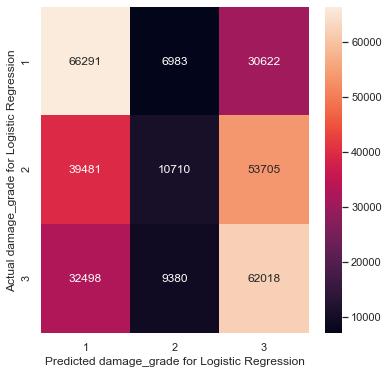

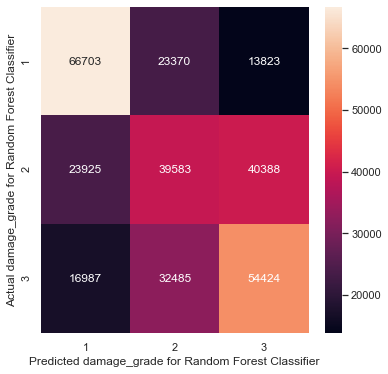

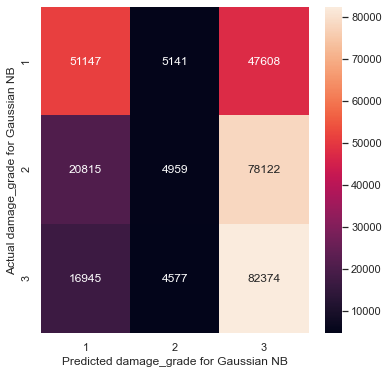

In [26]:
trial_models(X_data, y_data)

#### Train each model separately and test them to search for overfitting.

Logistic Regression:
Training set:
Accuracy: 0.446, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.479 		 0.385 		 0.426 		 0.430
Recall: 	 0.636 		 0.106 		 0.596 		 0.446
F1 score: 	 0.546 		 0.166 		 0.497 		 0.403

Test set:
Accuracy: 0.320, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.157 		 0.625 		 0.382 		 0.388
Recall: 	 0.628 		 0.107 		 0.594 		 0.443
F1 score: 	 0.252 		 0.182 		 0.465 		 0.300



Random Forest Classifier:
Training set:
Accuracy: 0.519, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.602 		 0.428 		 0.503 		 0.511
Recall: 	 0.673 		 0.359 		 0.526 		 0.519
F1 score: 	 0.636 		 0.390 		 0.514 		 0.513

Test set:
Accuracy: 0.436, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.228 		 0.631 		 0.422 		 0.427
Recall: 	 0.651 		 0.354 		 0.513 		 0.506
F1 score: 	 0.338 		 0.453 		 0.463 		 0.418



Gaussian NB:
Training set:
Ac

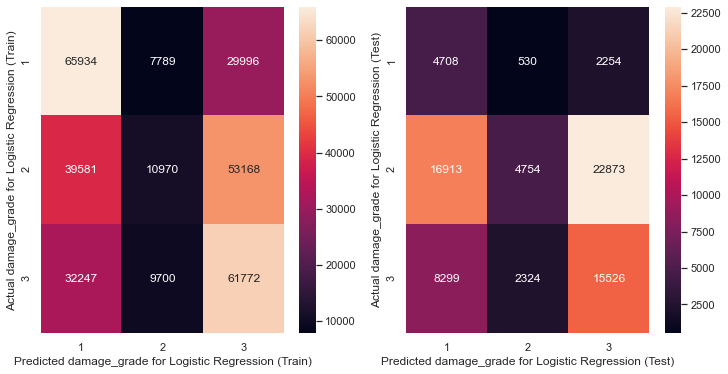

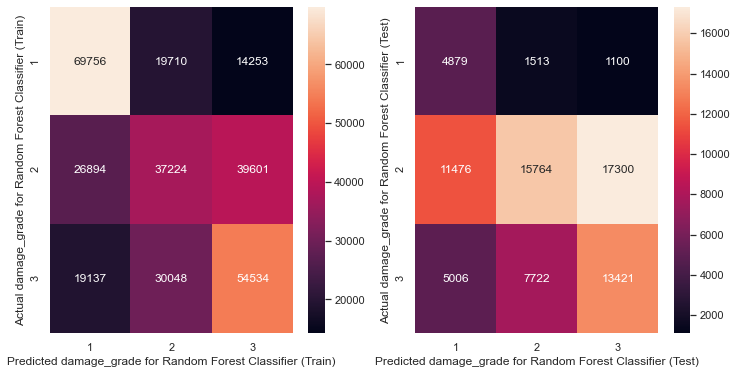

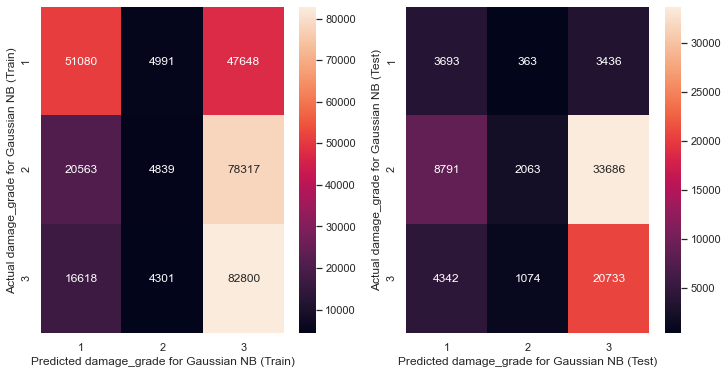

In [27]:
run_test(X_data, y_data)

From the above plots, the accuracy, precision, recall and F1 scores of the models trained by splitting the dataset into tall buildings and short buildings are generally better than the models trained by considering all of the training set together. Therefore, to achieve better predictions with our model, we split the dataset into tall and short buildings.

From the above plots, random forest classifier consistently has the highest classification accuracy, precision, recall and F1 score compared to the other models for the different datasets. Therefore, random forest classifier is the best model to predict `damage_grade`.

## Using random forest classifier on the test set.

#### Tall buildings

Training set:
Accuracy: 0.725, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.725 		 0.761 		 0.704 		 0.730
Recall: 	 0.931 		 0.479 		 0.765 		 0.725
F1 score: 	 0.815 		 0.588 		 0.733 		 0.712

Test set:
Accuracy: 0.504, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.473 		 0.655 		 0.398 		 0.509
Recall: 	 0.800 		 0.376 		 0.534 		 0.570
F1 score: 	 0.594 		 0.478 		 0.456 		 0.509



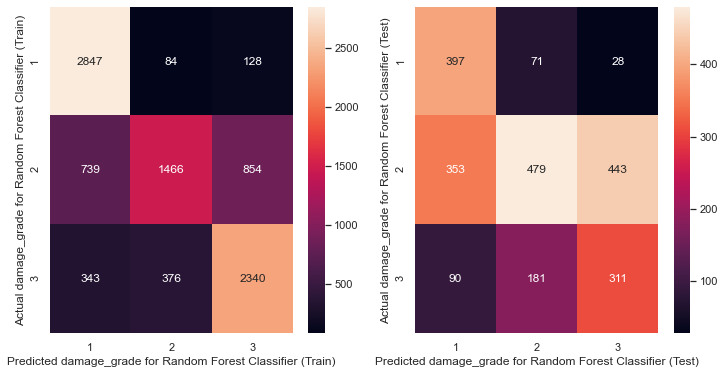

In [28]:
tall_forest = RandomForestClassifier(max_depth = 10)
run_random_forest(tall_forest, X_tall_data, y_tall_data)

#### Short buildings

Training set:
Accuracy: 0.514, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.594 		 0.425 		 0.506 		 0.509
Recall: 	 0.662 		 0.388 		 0.493 		 0.514
F1 score: 	 0.626 		 0.406 		 0.499 		 0.510

Test set:
Accuracy: 0.437, Standard Deviation: 0.000

damage_grade:	 1 		 2 		 3 		 Average

Precision: 	 0.220 		 0.623 		 0.425 		 0.422
Recall: 	 0.635 		 0.377 		 0.481 		 0.498
F1 score: 	 0.327 		 0.470 		 0.451 		 0.416



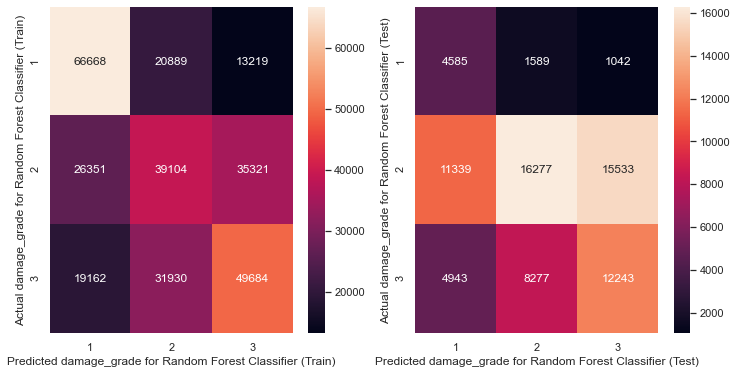

In [29]:
short_forest = RandomForestClassifier(max_depth = 10)
run_random_forest(short_forest, X_short_data, y_short_data)

## Using random forest to predict the proability of a building receiving each `damage_grade`.

#### Randomly choose 5 tall buildings and 5 short buildings to sample.

In [30]:
chosen_tall = tall_buildings.sample(3)
chosen_tall

,count_floors_pre_eq,age,height_percentage,area_percentage,count_families,damage_grade
239245,3,5,10,10,1,1
197139,2,35,10,9,1,3
34444,3,25,11,10,1,2


In [31]:
chosen_short = short_buildings.sample(3)
chosen_short

,count_floors_pre_eq,age,height_percentage,area_percentage,count_families,damage_grade
137058,1,5,3,7,1,1
167339,2,20,4,5,1,3
137956,2,5,4,3,1,2


#### Use the models trained to predict probabilities of each `damage_grade`.

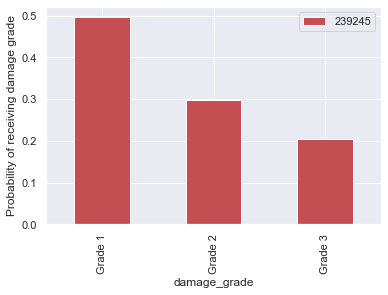

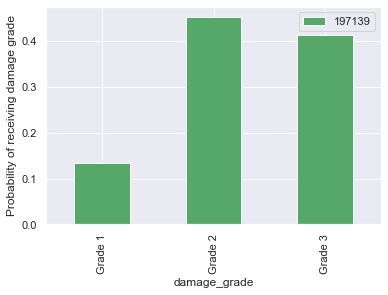

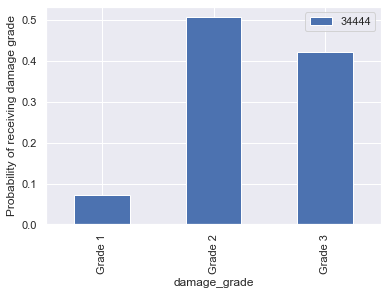

In [32]:
chosen_tall_proba = pd.DataFrame(tall_forest.predict_proba(X = chosen_tall[['count_floors_pre_eq', 'age', 'height_percentage', 'area_percentage']]), index = chosen_tall.index, columns = ['Grade 1', 'Grade 2', 'Grade 3'])

colours = ['r', 'g', 'b', 'c', 'm']
for i in range(len(chosen_tall_proba)):
    sample_pred = pd.DataFrame(chosen_tall_proba.iloc[i, :])
    sample_pred.plot.bar(color = colours[i], xlabel = 'damage_grade', ylabel = 'Probability of receiving damage grade')

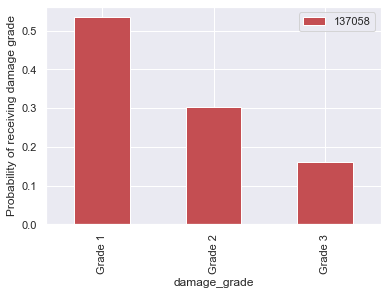

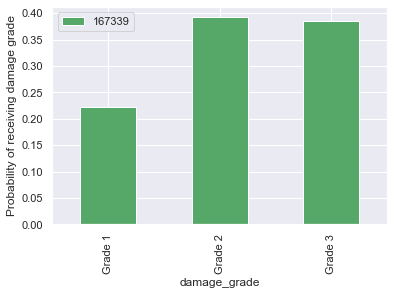

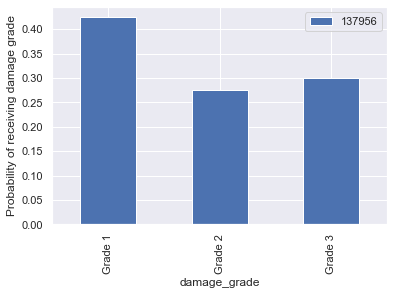

In [33]:
chosen_short_proba = pd.DataFrame(short_forest.predict_proba(X = chosen_short[['count_floors_pre_eq', 'age', 'height_percentage', 'area_percentage']]), index = chosen_short.index, columns = ['Grade 1', 'Grade 2', 'Grade 3'])

colours = ['r', 'g', 'b', 'c', 'm']
for i in range(len(chosen_short_proba)):
    sample_pred = pd.DataFrame(chosen_short_proba.iloc[i, :])
    sample_pred.plot.bar(color = colours[i],  xlabel = 'damage_grade', ylabel = 'Probability of receiving damage grade')